In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

# Now I'm Use breast cancer dataset



In [2]:
data = datasets.load_breast_cancer()
print("Information of data: ",data.DESCR)

Information of data:  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fie

In [5]:
data.data
data.target
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
#Bunch type of data convert into dtaframe
df = pd.DataFrame(data=data.data)
df.columns = data.feature_names
df['diagnosis'] = data.target

In [36]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.describe()
df.shape

(569, 31)

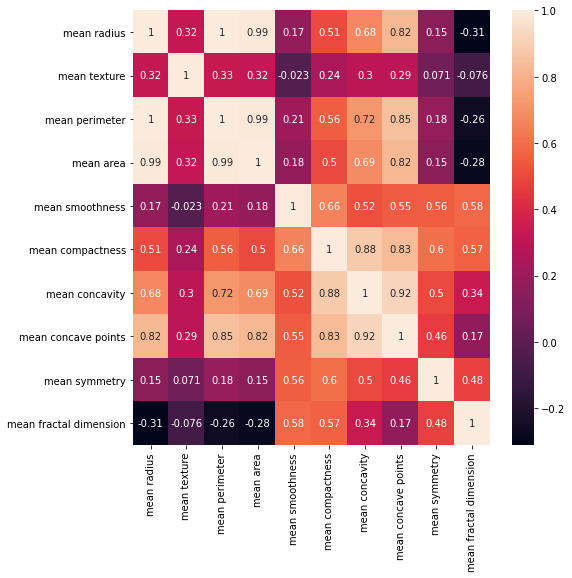

In [55]:
# draw heatmap b/w mean features and diagnosis(target)
features_mean = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness',
               'mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension']
df[features_mean].corr()
plt.figure(figsize=(8,8))
heat = sns.heatmap(df[features_mean].corr(), annot=True)

In [89]:
# Splitting the dataset into malignant and benign.
dataMalignant = df[df['diagnosis'] == 1] 
dataBenign = df[df['diagnosis'] == 0]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


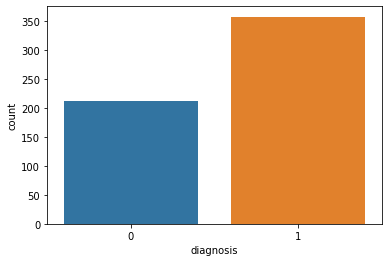

In [76]:
sns.countplot(df['diagnosis'])

In [90]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [97]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)
y_pred = svm.predict(x_test)

array([[ 51,   1],
       [ 12, 107]])

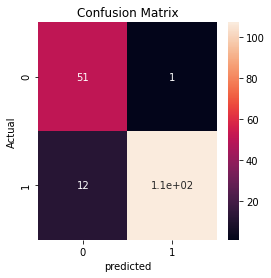

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(4,4))
sns.heatmap(cm.round(3),annot=True)
plt.xlabel("predicted")
plt.ylabel('Actual')
plt.title("Confusion Matrix")
cm

In [108]:
acc = (51+107) / (51+1+12+107)
print("Accuracy of this model is : ",acc)
Error_rate = (1+12) / (51+1+12+107)
print("Error Rate of this model is : ",Error_rate)
True_positive = (51) / (51+12)
print("Recall or True Positive Rate of this model is : ",True_positive)

Accuracy of this model is :  0.9239766081871345
Error Rate of this model is :  0.07602339181286549
Recall or True Positive Rate of this model is :  0.8095238095238095


In [112]:
#compare predicted data and actual data
compare_df = pd.DataFrame(data=y_test)
compare_df.columns = ['Actual Data']
compare_df['Predicted Data'] = y_pred

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


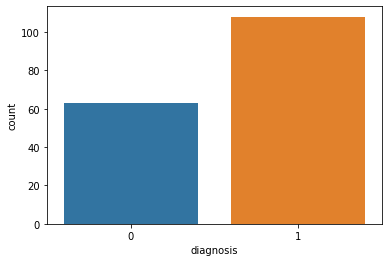

In [120]:
sns.countplot(y_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


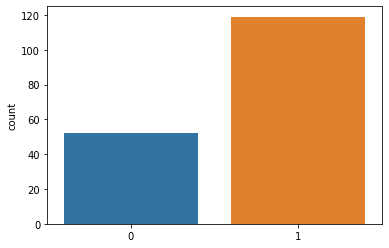

In [118]:
predict = sns.countplot(y_pred)

# Thank You !
